In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [2]:
diab=pd.read_csv("DATASETS/diabetes.csv")
df=pd.DataFrame(diab)
print(df.shape)
df.head()

(2000, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
zero_not_accepted=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for column in zero_not_accepted:
    df[column]=df[column].replace(0,np.NaN)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)
    print(df[column])

0       138.0
1        84.0
2       145.0
3       135.0
4       139.0
        ...  
1995     75.0
1996    179.0
1997     85.0
1998    129.0
1999     81.0
Name: Glucose, Length: 2000, dtype: float64
0        62.0
1        82.0
2        72.0
3        68.0
4        62.0
        ...  
1995     64.0
1996     72.0
1997     78.0
1998    110.0
1999     72.0
Name: BloodPressure, Length: 2000, dtype: float64
0       35.0
1       31.0
2       29.0
3       42.0
4       41.0
        ... 
1995    24.0
1996    42.0
1997    29.0
1998    46.0
1999    15.0
Name: SkinThickness, Length: 2000, dtype: float64
0       153.0
1       125.0
2       153.0
3       250.0
4       480.0
        ...  
1995     55.0
1996    130.0
1997    153.0
1998    130.0
1999     76.0
Name: Insulin, Length: 2000, dtype: float64
0       33.6
1       38.2
2       44.2
3       42.3
4       40.7
        ... 
1995    29.7
1996    32.7
1997    31.2
1998    67.1
1999    30.1
Name: BMI, Length: 2000, dtype: float64


In [5]:
##split dataset into train and test
x=df.iloc[:,0:8]
y=df.iloc[:,8]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [6]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test==sc_x.fit_transform(x_test)
print(x_train)

[[ 1.31258816 -1.88298216 -0.03272522 ... -0.08993839  0.40439834
   0.78518105]
 [-1.1033506   1.93380949 -0.5334389  ...  1.29953138  4.42802135
  -0.67613495]
 [-0.80135826 -1.28557129 -0.36653434 ... -2.00740669  0.47908276
  -0.50421542]
 ...
 [ 1.31258816  1.10407218 -0.86724803 ...  0.18795556  0.22702285
   1.12902011]
 [ 0.10461878  1.63510406 -0.03272522 ...  1.52184655  0.0278644
  -0.59017518]
 [ 0.10461878  2.03337797 -0.03272522 ... -0.59014751 -0.80299975
   0.26942246]]


In [7]:
#KNN is a lazy learner model which learns when it is tested...so it is diff from other models like logistic or linear regression
# decision tree rtc
#the performance of KNN is slow ,when it is tested it recalls the training data sets

In [8]:
classifier=KNeighborsClassifier(n_neighbors=19,metric="euclidean") #here 19 is given on based of value (sqr_root(x_test)-1)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [9]:
#predict the test result
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(f1_score(y_test,y_pred))

[[  0 404]
 [  2 194]]
0.48866498740554154


In [11]:
print(f1_score)

<function f1_score at 0x000000CA0A5FF828>


In [12]:
#KNeighbor classifier algo
#split the dataset into train and test
x=df.iloc[:,0:8]
y=df.iloc[:,8]
kfold=model_selection.KFold(n_splits=10,random_state=7)

In [13]:
classifier=KNeighborsClassifier(n_neighbors=19,metric="euclidean")
results=model_selection.cross_val_score(classifier,x,y, cv=kfold)

In [14]:
print(results)
print(results.mean())

[0.74  0.715 0.8   0.8   0.8   0.835 0.745 0.695 0.84  0.74 ]
0.7710000000000001


In [1]:
#Gaussian base theorem

In [ ]:
#comparing the moedels

In [10]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

C:\Users\DELL\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\DELL\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [19]:
dataframe=pandas.read_csv("DATASETS/diabetes.csv")
array=dataframe.values
x=array[:,0:8]
y=array[:,8]
seed=7

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

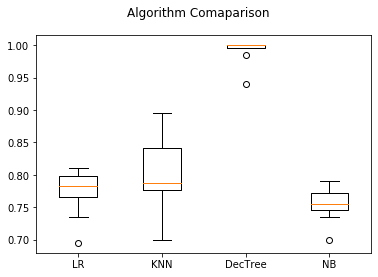

In [38]:
#prepare models
models=[]
models.append(("LR", LogisticRegression()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DecTree",DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))


#evaluate each models in turn
results = []
names=[]
scoring = "accuracy"
for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results =model_selection.cross_val_score(model,x,y, cv=kfold, scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" %(name,cv_results.mean(), cv_results.std())
    #print(msg)
    
#boxplot algo comparison
fig = plt.figure()
fig.suptitle("Algorithm Comaparison")
ax= fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)  
plt.show()

In [22]:
##Ensemble learner
#1:bagging (BOOTSTRAP AGGREGATING) ==> multiple homogeneous learners (using ony one type of algo)
#2:Boosting(Homogeneous learners)
#3:Voting(Hetergogeneous learners)

#bagging has diff types of classifiers ==>Bagging classifier(GREEDY class)... and Random forest classifier
#Boosting ==> Adaboost and 

In [24]:
#Bagged Decision Trees for classification
import pandas
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

C:\Users\DELL\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [25]:
df = pandas.read_csv("DATASETS/diabetes.csv")
x=df.drop("Outcome", axis=1)
y=df["Outcome"]

In [26]:
kfold = model_selection.KFold(n_splits=10,random_state=7)

In [27]:
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = model_selection.cross_val_score(model,x,y, cv=kfold)

In [28]:
print(results.mean())

0.9915


In [29]:
# 2. RandomForest Bagging Class..
#RandomForest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [30]:
df = pandas.read_csv("DATASETS/diabetes.csv")
x=df.drop("Outcome", axis=1)
y=df["Outcome"]

In [31]:
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10,random_state=7)
model = RandomForestClassifier(n_estimators= num_trees, max_features=max_features)
results = model_selection.cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.992


In [32]:
#voting ensemble classif..
from sklearn.ensemble import VotingClassifier

In [33]:
df = pandas.read_csv("DATASETS/diabetes.csv")
x=df.drop("Outcome", axis=1)
y=df["Outcome"]

In [34]:
seed=7
kfold = model_selection.KFold(n_splits=10,random_state=seed)

In [35]:
# creating the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(("Logistic", model1))
model2 = DecisionTreeClassifier()
estimators.append(("DecisionTree",model2))

In [36]:
#create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble,x,y,cv=kfold)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [37]:
print(results.mean())

0.8385
